/tmp/ipykernel_354831/2287719040.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Karşılaşılan Sorun Sayısı', y='Paydaş (TR)', data=df,


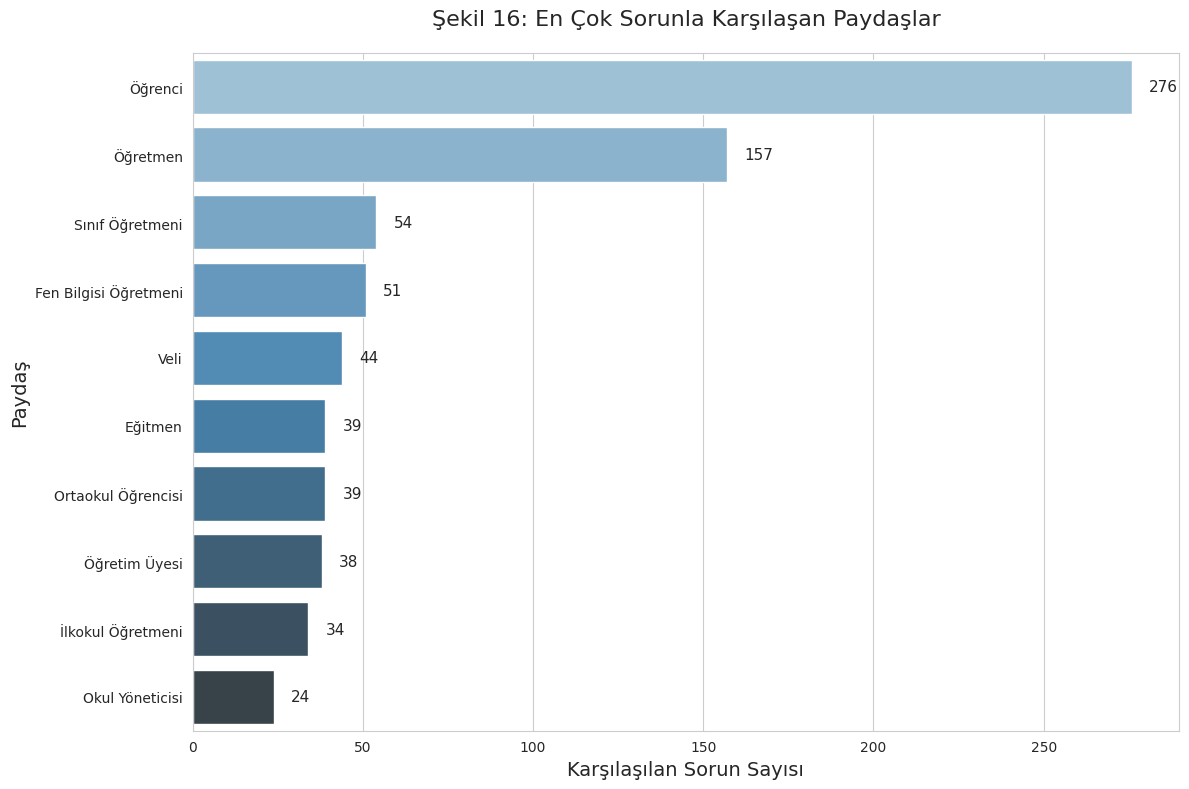

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri
paydaşlar = ["student", "teacher", "classroom teacher", "science teacher", 
             "parent", "instructor", "secondary school student", 
             "faculty member", "primary school teacher", "school administrator"]
sorun_sayıları = [276, 157, 54, 51, 44, 39, 39, 38, 34, 24]

# DataFrame oluşturma
df = pd.DataFrame({'Paydaş': paydaşlar, 'Karşılaşılan Sorun Sayısı': sorun_sayıları})

# Türkçe paydaş adları
tr_paydaşlar = ["Öğrenci", "Öğretmen", "Sınıf Öğretmeni", "Fen Bilgisi Öğretmeni", 
                "Veli", "Eğitmen", "Ortaokul Öğrencisi", 
                "Öğretim Üyesi", "İlkokul Öğretmeni", "Okul Yöneticisi"]
df['Paydaş (TR)'] = tr_paydaşlar

# Grafik ayarları
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Renkler
colors = sns.color_palette("Blues_d", len(df))

# Yatay çubuk grafiği
ax = sns.barplot(x='Karşılaşılan Sorun Sayısı', y='Paydaş (TR)', data=df, 
                 palette=colors)

# Değerlerin gösterilmesi
for i, v in enumerate(df['Karşılaşılan Sorun Sayısı']):
    ax.text(v + 5, i, str(v), va='center', fontsize=11)

# Başlık ve etiketler
plt.title('Şekil 16: En Çok Sorunla Karşılaşan Paydaşlar', fontsize=16, pad=20)
plt.xlabel('Karşılaşılan Sorun Sayısı', fontsize=14)
plt.ylabel('Paydaş', fontsize=14)

plt.tight_layout()
plt.savefig('sekil16_en_cok_sorunla_karsilasan_paydaslar.png', dpi=300)
plt.show()

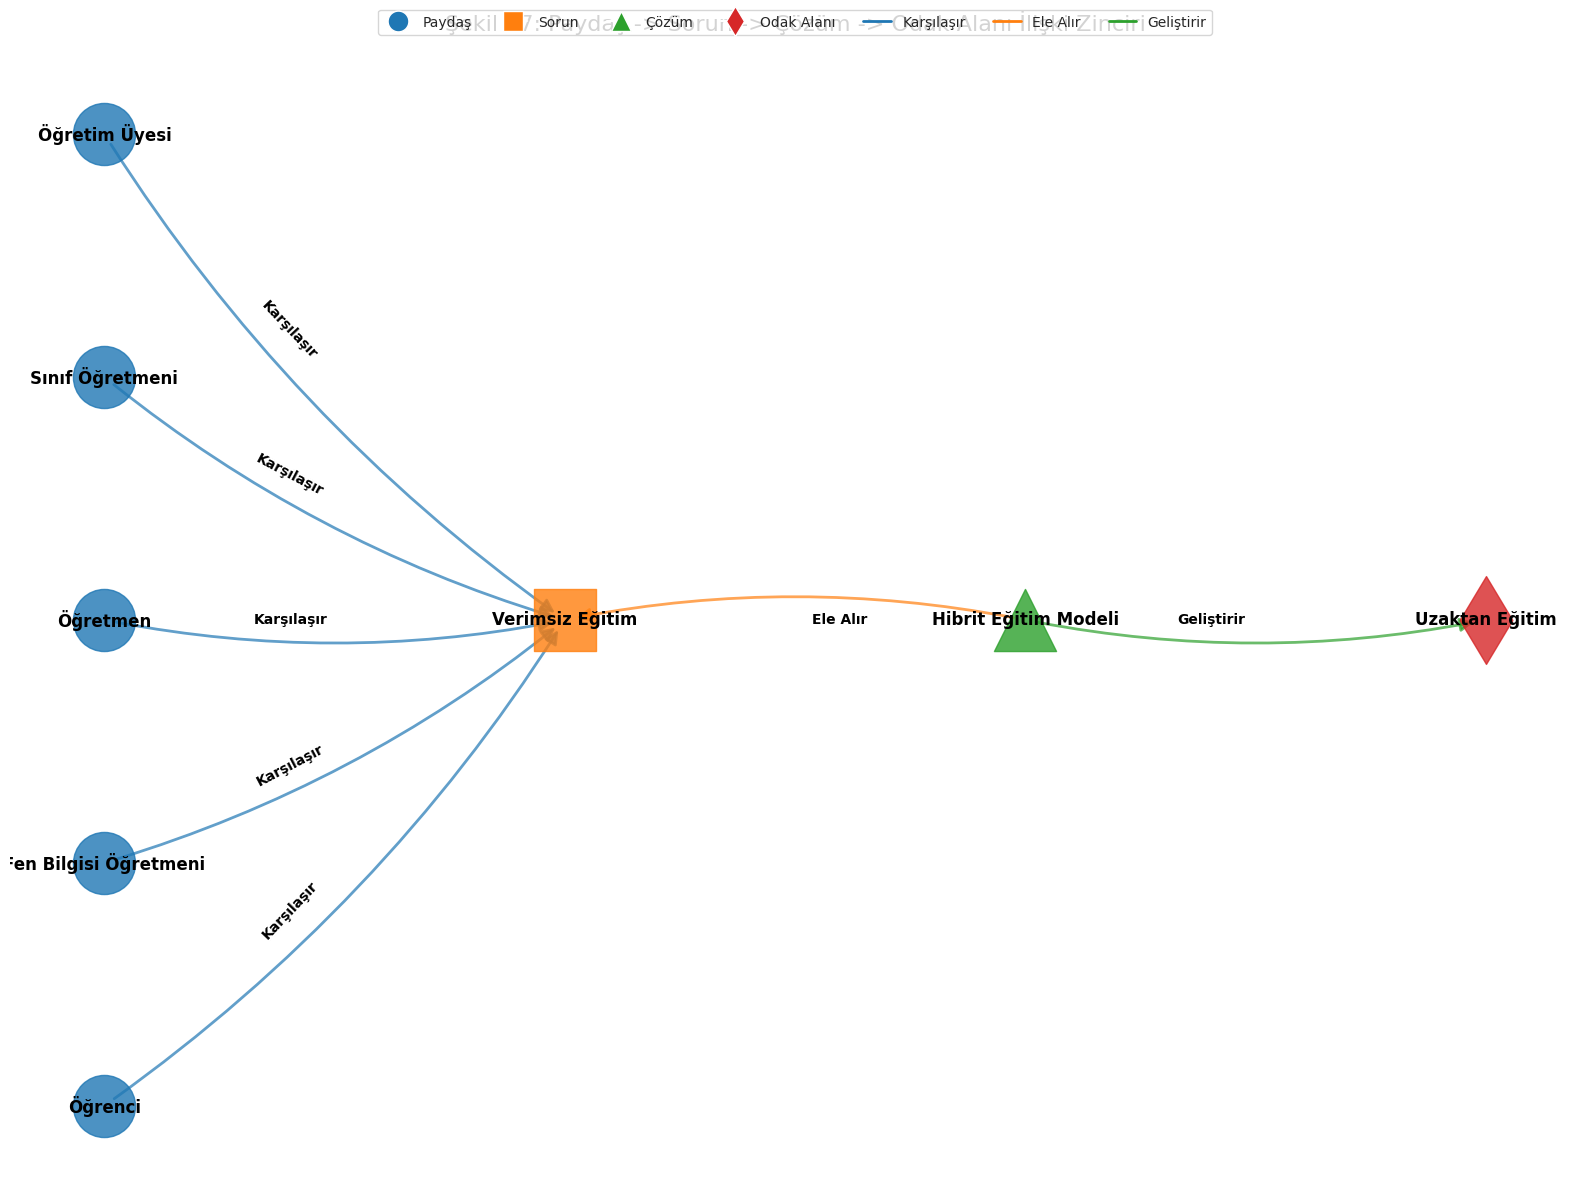

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import to_rgba

# Veri
data = [
    {"Paydaş": "faculty member", "Karşılaşılan_Sorun": "inefficient education", 
     "Ele_Alan_Çözüm": "hybrid education model", "Geliştirilen_Odak_Alanı": "distance education"},
    {"Paydaş": "classroom teacher", "Karşılaşılan_Sorun": "inefficient education", 
     "Ele_Alan_Çözüm": "hybrid education model", "Geliştirilen_Odak_Alanı": "distance education"},
    {"Paydaş": "teacher", "Karşılaşılan_Sorun": "inefficient education", 
     "Ele_Alan_Çözüm": "hybrid education model", "Geliştirilen_Odak_Alanı": "distance education"},
    {"Paydaş": "science teacher", "Karşılaşılan_Sorun": "inefficient education", 
     "Ele_Alan_Çözüm": "hybrid education model", "Geliştirilen_Odak_Alanı": "distance education"},
    {"Paydaş": "student", "Karşılaşılan_Sorun": "inefficient education", 
     "Ele_Alan_Çözüm": "hybrid education model", "Geliştirilen_Odak_Alanı": "distance education"}
]

# Türkçe çeviriler
tr_labels = {
    "faculty member": "Öğretim Üyesi",
    "classroom teacher": "Sınıf Öğretmeni",
    "teacher": "Öğretmen",
    "science teacher": "Fen Bilgisi Öğretmeni",
    "student": "Öğrenci",
    "inefficient education": "Verimsiz Eğitim",
    "hybrid education model": "Hibrit Eğitim Modeli",
    "distance education": "Uzaktan Eğitim"
}

# Graf oluşturma
G = nx.DiGraph()

# Düğümleri ekle
all_nodes = set()
for item in data:
    all_nodes.add(item["Paydaş"])
    all_nodes.add(item["Karşılaşılan_Sorun"])
    all_nodes.add(item["Ele_Alan_Çözüm"])
    all_nodes.add(item["Geliştirilen_Odak_Alanı"])

for node in all_nodes:
    G.add_node(node)

# Kenarları ekle
for item in data:
    G.add_edge(item["Paydaş"], item["Karşılaşılan_Sorun"], relation="FACES")
    G.add_edge(item["Ele_Alan_Çözüm"], item["Karşılaşılan_Sorun"], relation="ADDRESSES")
    G.add_edge(item["Ele_Alan_Çözüm"], item["Geliştirilen_Odak_Alanı"], relation="ENHANCES")

# Düğüm türleri için renkler
node_colors = {
    "faculty member": "#1f77b4",  # Mavi
    "classroom teacher": "#1f77b4",
    "teacher": "#1f77b4",
    "science teacher": "#1f77b4",
    "student": "#1f77b4",
    "inefficient education": "#ff7f0e",  # Turuncu
    "hybrid education model": "#2ca02c",  # Yeşil
    "distance education": "#d62728"  # Kırmızı
}

# Düğüm türleri için şekiller
node_shapes = {
    "faculty member": "o",  # Daire
    "classroom teacher": "o",
    "teacher": "o",
    "science teacher": "o",
    "student": "o",
    "inefficient education": "s",  # Kare
    "hybrid education model": "^",  # Üçgen
    "distance education": "d"  # Baklava
}

# Grafik ayarları
plt.figure(figsize=(16, 12))

# Düğüm konumlarını ayarla
pos = {
    # Paydaşlar sol tarafta
    "faculty member": (-2, 4),
    "classroom teacher": (-2, 2),
    "teacher": (-2, 0),
    "science teacher": (-2, -2),
    "student": (-2, -4),
    
    # Sorun ortada sol
    "inefficient education": (0, 0),
    
    # Çözüm ortada sağ
    "hybrid education model": (2, 0),
    
    # Odak alanı sağda
    "distance education": (4, 0)
}

# Düğümleri çiz
for node in G.nodes():
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=[node],
        node_size=2000,
        node_color=node_colors[node],
        node_shape=node_shapes[node],
        alpha=0.8
    )

# Kenarları çiz
edge_colors = {
    "FACES": "#1f77b4",  # Mavi
    "ADDRESSES": "#ff7f0e",  # Turuncu
    "ENHANCES": "#2ca02c"  # Yeşil
}

for u, v, data in G.edges(data=True):
    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        width=2,
        alpha=0.7,
        edge_color=edge_colors[data["relation"]],
        connectionstyle="arc3,rad=0.1",
        arrows=True,
        arrowsize=20
    )

# Türkçe etiketleri kullanarak düğümleri etiketle
labels = {node: tr_labels.get(node, node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_weight='bold')

# İlişki türleri için etiketler
edge_labels = {}
for u, v, data in G.edges(data=True):
    relation = data["relation"]
    if relation == "FACES":
        edge_labels[(u, v)] = "Karşılaşır"
    elif relation == "ADDRESSES":
        edge_labels[(u, v)] = "Ele Alır"
    elif relation == "ENHANCES":
        edge_labels[(u, v)] = "Geliştirir"

# İlişki etiketlerini çiz
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_size=10,
    font_color='black',
    font_weight='bold',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=2),
    label_pos=0.4
)

# Lejantı oluştur
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor="#1f77b4", markersize=15, label='Paydaş'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="#ff7f0e", markersize=15, label='Sorun'),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor="#2ca02c", markersize=15, label='Çözüm'),
    plt.Line2D([0], [0], marker='d', color='w', markerfacecolor="#d62728", markersize=15, label='Odak Alanı'),
    plt.Line2D([0], [0], color=edge_colors["FACES"], lw=2, label='Karşılaşır'),
    plt.Line2D([0], [0], color=edge_colors["ADDRESSES"], lw=2, label='Ele Alır'),
    plt.Line2D([0], [0], color=edge_colors["ENHANCES"], lw=2, label='Geliştirir')
]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=7)

# Başlık
plt.title('Şekil 17: Paydaş -> Sorun -> Çözüm -> Odak Alanı İlişki Zinciri', fontsize=16, pad=20)

plt.axis('off')
plt.tight_layout()
plt.savefig('sekil17_ilişki_zinciri.png', dpi=300, bbox_inches='tight')
plt.show()